In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git

In [ ]:
%cd /content/drive/MyDrive/mmocr

/content/drive/MyDrive/mmocr


In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install mmcv
!mim install mmdet
!pip install -v -e .
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.9/366.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 27.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 13.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━

In [ ]:
!python tools/dataset_converters/textrecog/data_migrator.py /content/drive/MyDrive/mmocr/data/labels_test.txt /content/drive/MyDrive/mmocr/data/anh_dang_kiem/textrecog_test.json --format txt

finish


In [ ]:
!python tools/dataset_converters/prepare_dataset.py anh_dang_kiem --task textrecog

/content/drive/MyDrive/mmocr/tools/dataset_converters/prepare_dataset.py:133: UserWarning: anh_dang_kiem is not supported yet. Please check dataset zoo for supported datasets.
  warnings.warn(f'{dataset} is not supported yet. Please check '


In [ ]:
import os
file_path = "/content/drive/MyDrive/mmocr/data/anh_dang_kiem/textrecog_imgs/train/labels.txt"
output_path = "/content/drive/MyDrive/mmocr/data/labels.txt"
with open(file_path, 'r') as input_file, open(output_path, 'w') as output_file:
    # Read the contents of the input file
    full_string=""
    for line in input_file:
      path = line.split(' ',1)
      file_name = os.path.basename(path[0])
      full_file_path = "/content/drive/MyDrive/mmocr/data/anh_dang_kiem/textrecog_imgs/train/"+file_name
      # print(path)
      string = full_file_path+'\t'+path[1]
      full_string+=string
    # Write the contents to the output file
    output_file.write(full_string)

    # Close the files
    input_file.close()
    output_file.close()

In [ ]:
file_path='/content/drive/MyDrive/mmocr/dicts/charset_vn.txt'
output_path = "/content/drive/MyDrive/mmocr/dicts/charset_vietnam.txt"
with open(file_path, 'r') as input_file, open(output_path, 'w') as output_file:
    # Read the contents of the input file
    full_string=""
    for line in input_file:
      path = line.split('\t')
      string = path[1]
      full_string+=string
    # print(full_string)
    # Write the contents to the output file
    output_file.write(full_string)

    # Close the files
    input_file.close()
    output_file.close()

Training

In [ ]:
import time
start_time = time.perf_counter()
!CUDA_VISIBLE_DEVICES=0 python tools/train.py /content/drive/MyDrive/mmocr/configs/textrecog/abinet/abinet_20e_st-an_mj.py --work-dir anh_dang_kiem/ --amp
end_time = time.perf_counter()
print("Time taken: ", end_time - start_time, " seconds")
# Time taken:  6120.91108658  seconds

04/28 03:18:11 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 16371992
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,c

In [ ]:
!python tools/infer.py /content/drive/MyDrive/mmocr/results3 --rec ABINet --rec-weights anh_dang_kiem/best_recog_word_acc_epoch_25.pth --show --print-result

Loads checkpoint by local backend from path: anh_dang_kiem/best_recog_word_acc_epoch_25.pth
/content/drive/MyDrive/mmocr/mmocr/models/textrecog/module_losses/ce_module_loss.py:101: UserWarning: padding does not exist in the dictionary
  warnings.warn(
/content/drive/MyDrive/mmocr/mmocr/models/textrecog/postprocessors/base.py:60: UserWarning: padding does not exist in the dictionary
  warnings.warn(
04/27 18:35:17 - mmengine - WARNING - Failed to search registry with scope "mmocr" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmocr" is a correct scope, or whether the registry is initialized.
04/27 18:35:17 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/usr/local/lib/python3.9/dist-packages/mmcv/cnn/bricks/transformer.py:819: 
  warnings.warn(f'Use same attn_mask in all attentions in

In [ ]:
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv>=2.0.0rc1'
!mim install 'mmdet>=3.0.0rc0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html


Loads checkpoint by local backend from path: /content/drive/MyDrive/mmocr/anh_dang_kiem/best_recog_word_acc_epoch_70.pth


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

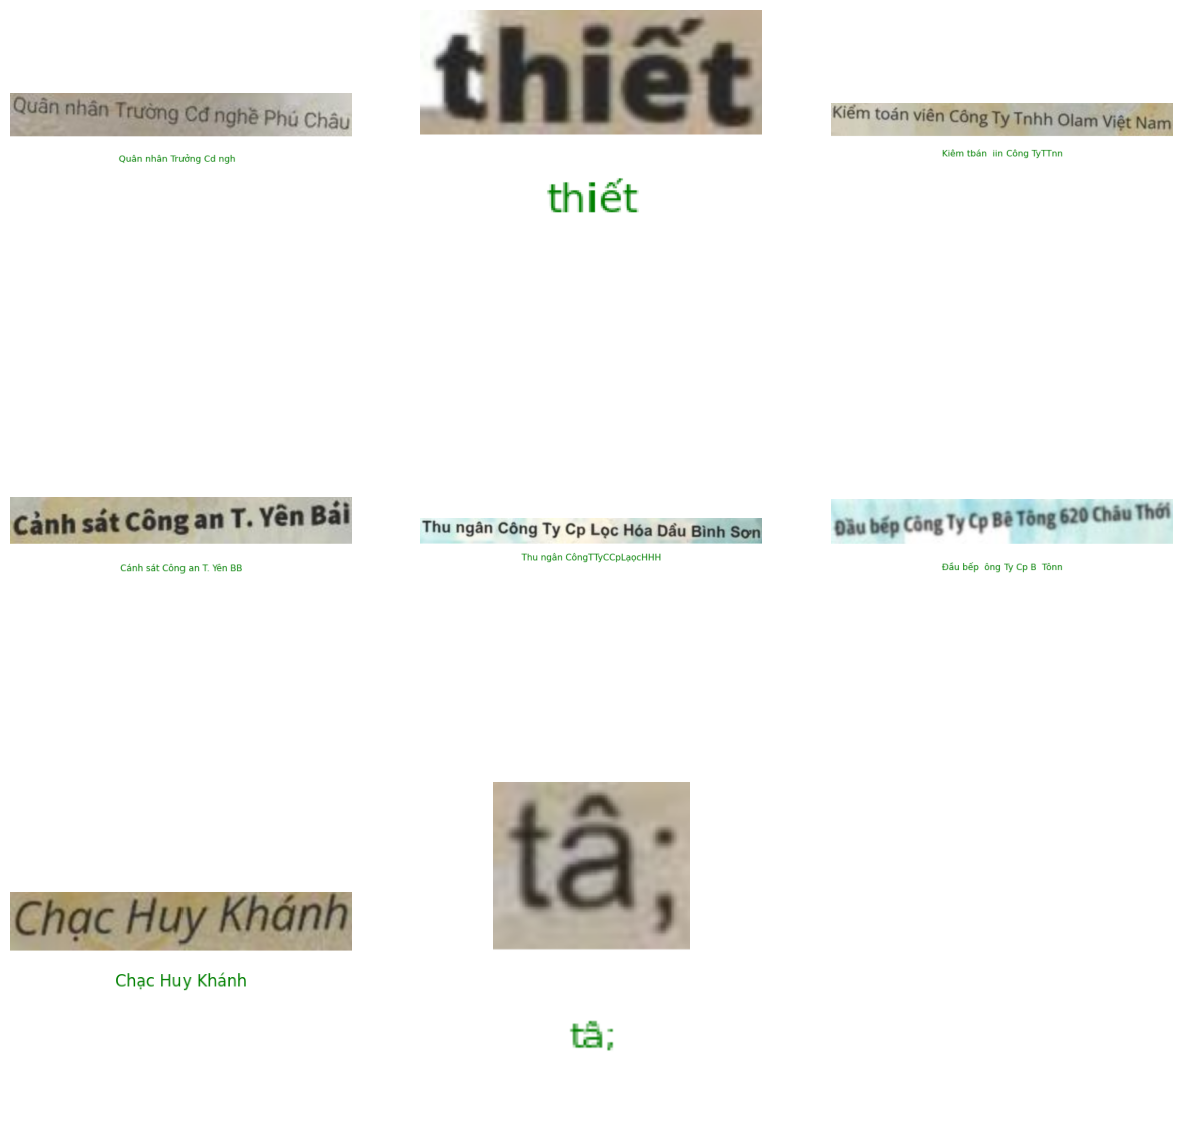

In [ ]:
from mmocr.apis import MMOCRInferencer
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

infer = MMOCRInferencer(rec='ABINet',rec_weights="/content/drive/MyDrive/mmocr/anh_dang_kiem/best_recog_word_acc_epoch_70.pth" )

folder_path = '/content/drive/MyDrive/mmocr/results4/' # Replace with the path to your folder
image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))

rows = int(np.sqrt(len(image_paths)))+1
cols = int(np.sqrt(len(image_paths)))+1
fig = plt.figure(figsize = (15, 15))
i=0
for path in image_paths:
  result = infer(path, save_vis=False, return_vis=True)
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(result['visualization'][0])
  ax.axis('off')
  i+=1

plt.show()

Loads checkpoint by local backend from path: /content/drive/MyDrive/mmocr/anh_dang_kiem/best_recog_word_acc_epoch_70.pth


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

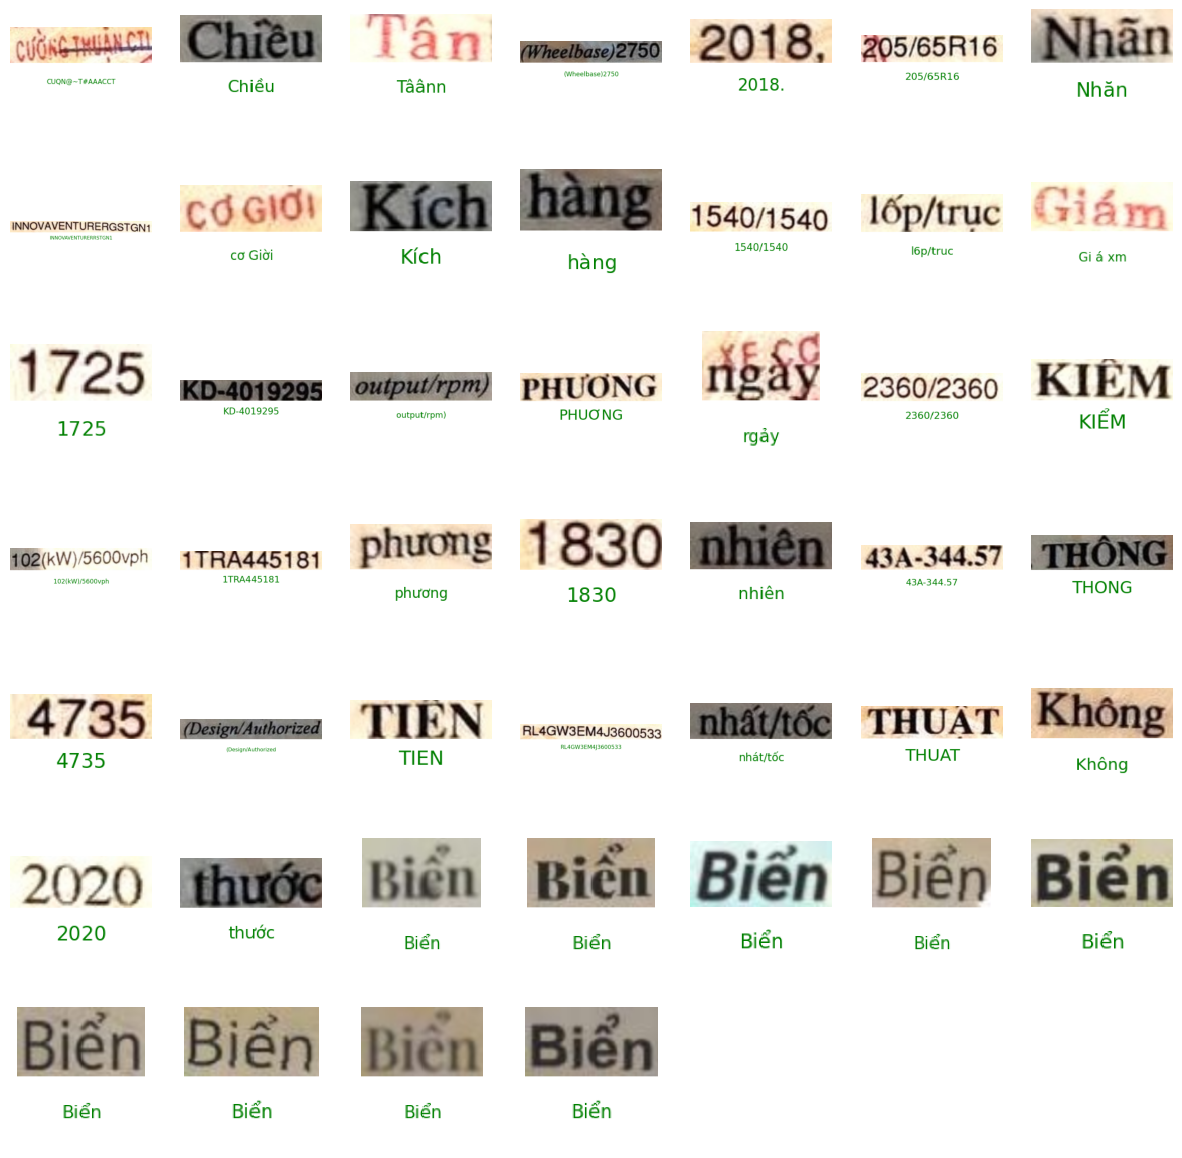

In [ ]:
from mmocr.apis import MMOCRInferencer
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

infer = MMOCRInferencer(rec='ABINet',rec_weights="/content/drive/MyDrive/mmocr/anh_dang_kiem/best_recog_word_acc_epoch_70.pth" )

folder_path = '/content/drive/MyDrive/mmocr/results3/' # Replace with the path to your folder
image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))

rows = int(np.sqrt(len(image_paths)))+1
cols = int(np.sqrt(len(image_paths)))+1
fig = plt.figure(figsize = (15, 15))
i=0
for path in image_paths:
  result = infer(path, save_vis=False, return_vis=True)
  ax = fig.add_subplot(rows, cols, i+1)
  ax.imshow(result['visualization'][0])
  ax.axis('off')
  i+=1

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
